<a href="https://colab.research.google.com/github/KartikKumar7070/Airbnb-Dataset/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Airbnb DATA SET***
Explanatory data analysis



## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')

In [27]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355


In [28]:
df.shape

(48895, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [31]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
# our first motto is to deal with missing values
#last_review-10052
#reviews_per_month-10052 

In [ ]:
df.drop('reviews_per_month',axis=1,inplace=True)
df.drop('last_review',axis=1,inplace=True)

In [12]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Removed two column ie. last_review , review_per_month as they not as useful for my analysis and also contain more number of null values and cannot be handled with certain surity

In [15]:
new_df =df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','latitude','longitude']]

In [34]:
new_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365,40.64749,-73.97237
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,40.75362,-73.98377
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365,40.80902,-73.94190
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,40.68514,-73.95976
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,40.79851,-73.94399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9,40.67853,-73.94995
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36,40.70184,-73.93317
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27,40.81475,-73.94867
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2,40.75751,-73.99112


#1. What can we learn about different hosts and areas?

In [35]:
new_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365,40.64749,-73.97237
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,40.75362,-73.98377


In [36]:
 new_df.groupby('neighbourhood_group')['calculated_host_listings_count'].size().sort_values(ascending=False).reset_index().head(10)

,neighbourhood_group,calculated_host_listings_count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [37]:
new_df.groupby('neighbourhood')['host_name'].size().sort_values(ascending=False).reset_index().head()

,neighbourhood,host_name
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


In [40]:
hosts_area = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().sort_values(ascending=False).reset_index().head(5)
hosts_area

,host_name,neighbourhood_group,calculated_host_listings_count
0,Sonder (NYC),Manhattan,327
1,Blueground,Manhattan,230
2,Michael,Manhattan,212
3,David,Manhattan,202
4,Michael,Brooklyn,159


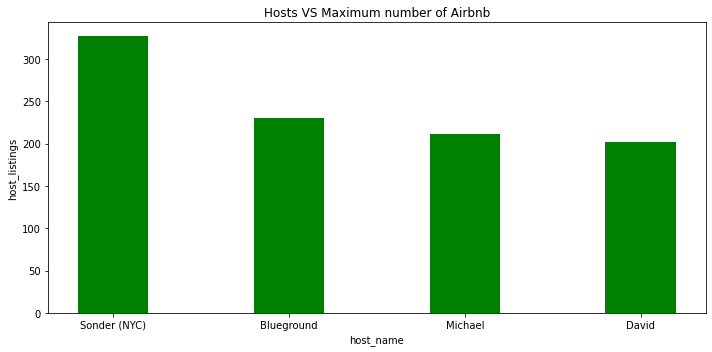

In [41]:
# we can visualize the above observation using bar graph
host_name = hosts_area['host_name']
host_listings = hosts_area['calculated_host_listings_count']

# Set the figure size
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(host_name,host_listings,color='green',width=0.4)
plt.xlabel('host_name')
plt.ylabel('host_listings')
plt.title('Hosts VS Maximum number of Airbnb')

# Display the plot
plt.show()


The Top 4 hosts are from MANHATTAN ie. Sonder(NYC),Blueground,Michael,David have most number of host listing count


##2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
new_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
area_review = new_df.groupby(['name','neighbourhood_group','room_type','price','minimum_nights'])['number_of_reviews'].count().reset_index()
price_review = area_review.sort_values(by='price',ascending=False).head(1000)
price_review


,name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
1112,1-BR Lincoln Center,Manhattan,Entire home/apt,10000,30,1
20220,Furnished room in Astoria apartment,Queens,Private room,10000,100,1
27225,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Entire home/apt,10000,5,1
41048,Spanish Harlem Apt,Manhattan,Entire home/apt,9999,5,1
36155,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Private room,9999,99,1
...,...,...,...,...,...,...
3871,Amazing Luxury Apt in the middle of Manhattan,Manhattan,Entire home/apt,539,1,1
8048,Bluebird Hell's Kitchen 1-BR + Killer City Views,Manhattan,Entire home/apt,534,30,1
8054,Bluebird Hells Kitchen 1-BR + Indoor B.Ball Ct!,Manhattan,Entire home/apt,534,30,1
8056,Bluebird Lavish 1-BR Apt 1 Mile from Times Squ...,Manhattan,Entire home/apt,534,30,1


## the tourist prefer mostly entire home and apartment and Manhattan is preferred by most of them ,Brooklyn is expensive as there prices are very high considering minimum nights spent,most of the tourist have given reviews 1 refers that they must have facen some problems with the Airbnb hospitality

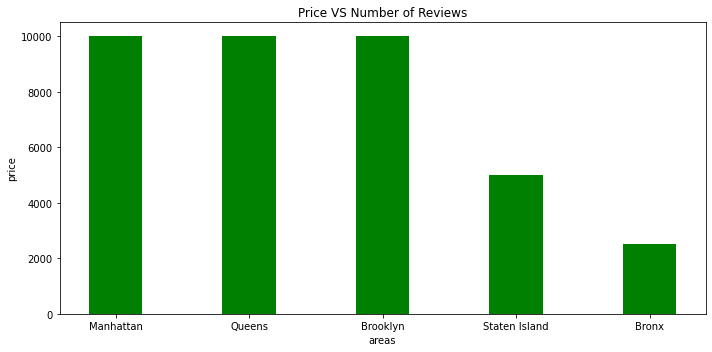

In [ ]:
# we can visualize the above observation using bar graph
area = price_review['neighbourhood_group']
price = price_review['price']

# Set the figure size
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(area,price,color='green',width=0.4)
plt.xlabel('areas')
plt.ylabel('price')
plt.title('Price VS Number of Reviews')

# Display the plot
plt.show()

In [ ]:
price_reviews = area_review.sort_values(by='number_of_reviews',ascending=False).head(100)
price_reviews


,name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
22524,Hillside Hotel,Queens,Private room,135,1,12
26248,Loft Suite @ The Box House Hotel,Brooklyn,Entire home/apt,199,3,11
4619,Artsy Private BR in Fort Greene Cumberland,Brooklyn,Private room,48,30,10
23573,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,Entire home/apt,175,30,5
22525,Hillside Hotel,Queens,Private room,165,1,5
...,...,...,...,...,...,...
32483,Perfect Manhattan Studio Apartment - Quiet Street,Manhattan,Entire home/apt,150,3,1
32492,Perfect NYC/Williamsburg Location,Brooklyn,Private room,119,3,1
32480,Perfect Loft - Minutes from Manhattan - Big Comfy,Brooklyn,Entire home/apt,300,2,1
32482,Perfect Luxury Studio in DUMBO,Brooklyn,Entire home/apt,175,2,1


from the above data it is observed that when prices are low then number of reviews are higher in comparision to when the prices was higher and people who are booking for more number of days are getting price lower as to others 

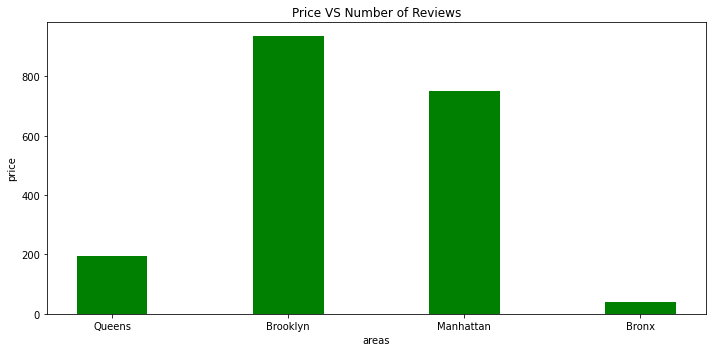

In [ ]:
area = price_reviews['neighbourhood_group']
price = price_reviews['price']

# Set the figure size
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(area,price,color='green',width=0.4)
plt.xlabel('areas')
plt.ylabel('price')
plt.title('Price VS Number of Reviews')

# Display the plot
plt.show()

from the above analysis most people prefer to stay where price is less

##3. Which hosts are the busiest and why?

In [ ]:
new_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
busiest_hosts= new_df.groupby(['host_name','neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='minimum_nights',ascending=False).head(10)
busiest_hosts

,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117
12438,Mike,Manhattan,Entire home/apt,109
545,Alex,Manhattan,Entire home/apt,98
16548,Sonder,Manhattan,Entire home/apt,96
8226,Jeremy & Laura,Manhattan,Entire home/apt,95
9549,Ken,Manhattan,Entire home/apt,95


the above is the dataframe of busiest hosts on the most busiest host is Sonder(NYC) as the the minimum nights spent on his Airbnb is Highest

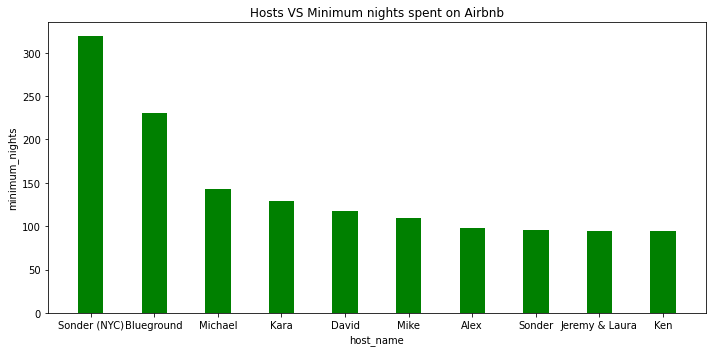

In [ ]:
# pl
host_name = busiest_hosts['host_name']
minimum_nights = busiest_hosts['minimum_nights']

# Set the figure size
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(host_name,minimum_nights,color='green',width=0.4)
plt.xlabel('host_name')
plt.ylabel('minimum_nights')
plt.title('Hosts VS Minimum nights spent on Airbnb')

# Display the plot
plt.show()

## 4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
new_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index().sort_values(by='minimum_nights',ascending=False).head(100)

In [ ]:
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


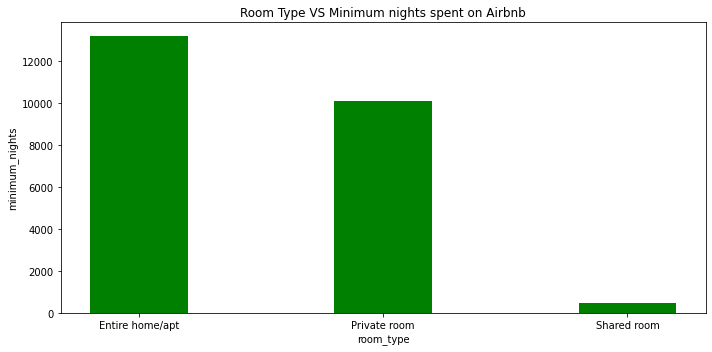

In [ ]:
room_type = traffic_areas['room_type']
minimum_nights = traffic_areas['minimum_nights']

# Set the figure size
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(room_type,minimum_nights,color='green',width=0.4)
plt.xlabel('room_type')
plt.ylabel('minimum_nights')
plt.title('Room Type VS Minimum nights spent on Airbnb')

# Display the plot
plt.show()

In [ ]:
new_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
#analysing the neighbourhood group with respect to latitude and longitude
df_geo = new_df.groupby(['longitude','latitude'])['neighbourhood_group'].count().reset_index().sort_values(by='neighbourhood_group',ascending=False)

In [ ]:
df_geo

,longitude,latitude,neighbourhood_group
33584,-73.94220,40.71232,3
34387,-73.94101,40.68398,2
5362,-73.99559,40.75584,2
43442,-73.91051,40.70125,2
7621,-73.99077,40.75888,2
...,...,...,...
16299,-73.97378,40.68679,1
16300,-73.97378,40.69146,1
16301,-73.97378,40.75266,1
16302,-73.97378,40.79253,1


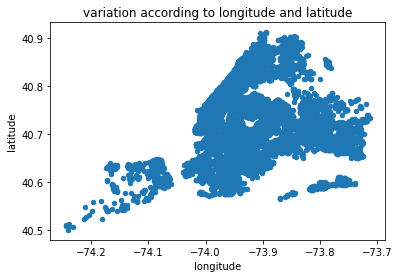

In [ ]:
df_geo.plot.scatter(x='longitude',y='latitude',title='variation according to longitude and latitude')

#**We can analyse that people prefer entire home/apartment or private room rather than shared rooms which are present in Manhattan,Brooklyn,Queen and people are preferring listings which are less in price**